Это домашнее задание нацелено на практику построения ансамблевых моделей с деревьями решений. Выполните задания 1-6. Необходимые датасеты `magic04.csv` и `lrs.csv`  находятся в этом же каталоге, где и это домашнее задание. Датасет для Задания 5 загружается с помощью команды `from sklearn.datasets import fetch_california_housing`.

Случайный лес
------------------------

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

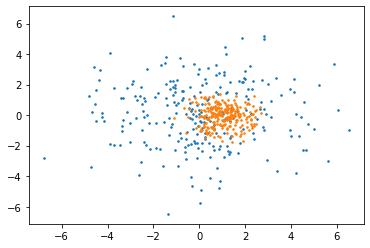

In [ ]:
np.random.seed(43)

n = 250

mu1 = np.array([0.0,0])
mu2 = np.array([1.0,0])
sigma1 = 5.0 * np.diag(np.array([1.0, 1.0]))
sigma2 = 0.5 * np.diag(np.array([1.0, 1.0]))

x1 = np.random.multivariate_normal(mu1, sigma1, n)
x2 = np.random.multivariate_normal(mu2, sigma2, n)
x = np.vstack([x1, x2])
y = np.concatenate([np.full(x1.shape[0], 0), np.full(x2.shape[0], 1)])

plt.figure()
plt.scatter(*x1.T,s=2.5)
plt.scatter(*x2.T,s=2.5)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

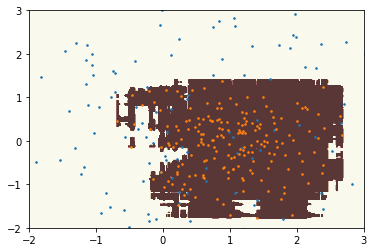

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

x_grid = np.linspace(np.min(x), np.max(x), 2000)
xx, yy = np.meshgrid(x_grid, x_grid)
xx_test = np.stack((xx,yy), axis=-1).reshape(-1, 2)

c = RandomForestClassifier(random_state=0, max_depth=15)

c.fit(x_train, y_train)
pred = c.predict(xx_test).reshape(xx.shape)

x1_train = x_train[y_train == 0]
x2_train = x_train[y_train == 1]

plt.figure()
plt.xlim(-2,3)
plt.ylim(-2,3)
plt.contourf(xx, yy, pred, cmap="pink_r")
plt.scatter(*x1_train.T,s=2.5)
plt.scatter(*x2_train.T,s=2.5)

# Задание 1
Используйте готовый класс `RandomForestClassifier` чтобы проверить как работает классификация с помощью метода случайного леса. С помощью метода кросс-валидации получите и постройте на графике зависимость точности (accuracy) (для учебного и тестового множеств) от максимальной глубины деревьев случайного леса. Используйте данные из примера про дерево классификации.

In [ ]:
# код потерялся

In [ ]:
scores = flat_dict(scores)

In [ ]:
plt.plot(max_depths, scores['train_accuracy'].mean(axis=1), '-*', label="train accuracy")
plt.plot(max_depths, scores['test_accuracy'].mean(axis=1), '-*', label="test accuracy")
plt.xlabel("Tree max depth")
plt.ylabel("Accuracy")
_ = plt.legend()

In [ ]:
import sklearn.metrics

def evaluate(c, x, y):
    y_pred = c.predict(x)
    if getattr(c, "decision_function", None):
        scores = c.decision_function(x)
    else:
        scores = c.predict_proba(x)[:,1]

    tn, fp, fn, tp = sklearn.metrics.confusion_matrix(y, y_pred, labels=['h', 'g']).ravel()
    accuracy  = (tp + tn) / (tn + fp + fn + tp)
    precision = tp / (tp + fp)
    recall    = tp / (tp + fn)
    specificity = tn / (tn + fp)
    baccuracy = 0.5 * (specificity + recall)
    f1 = 2 * precision * recall / (precision + recall)
    
    print("Accuracy                  = {:.4f}".format(accuracy))
    print("Ballanced accuracy        = {:.4f}".format(baccuracy))
    print("F1                        = {:.4f}".format(f1))
    print("Precision (PPV)           = {:.4f}".format(precision))
    print("Recall (sensitivity, TPR) = {:.4f}".format(recall))
    print("Specificity (TNR, 1-FPR)  = {:.4f}".format(specificity))
    
    min_score, max_score = np.min(scores), np.max(scores)
    bins = np.linspace(min_score, max_score, 25)
    plt.figure()
    plt.hist(scores[y.reshape(-1) == 'h'], bins, alpha=0.5, label='Hadron (negative)')
    plt.hist(scores[y.reshape(-1) == 'g'], bins, alpha=0.5, label='Gamma (positive)')
    plt.xlabel("Decision function (value)")
    plt.ylabel("Frequency")
    plt.legend()
    
    tpr, fpr, _ = sklearn.metrics.roc_curve(y, scores, pos_label='g')
    auc = sklearn.metrics.roc_auc_score(y, scores)
    plt.figure()
    plt.plot(fpr, tpr)
    plt.title("Receiver operating characteristic")
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    print("AUC                       = {:.4f}".format(auc))

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

names = ["length", "width", "size", "conc", "conc1", "asym", "m3long", "m3trans", "alpha", "dist", "class"]
data = pd.read_csv('magic04.csv', names=names)

x = np.asarray(data.iloc[:, :-1])
y = np.asarray(data.iloc[:, [-1]])

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

c = RandomForestClassifier(random_state=0)

c.fit(x_train, y_train.reshape(-1))

train_acc = c.score(x_train, y_train) # accuracy
test_acc = c.score(x_test, y_test)

evaluate(c, x_test, y_test)

#Задание 2

Используя данные с черенковского телескопа из файла `magic04.csv` и метод кросс-валидации подберите максимальную глубину случайного леса таким образом, чтобы получить наилучший AUC при бинарной классификации методом случайного леса (`RandomForestClassifier`).
Постройте график зависимости AUC от глубины дерева.

In [ ]:
# код потерялся

In [ ]:
scores = flat_dict(scores)

np.set_printoptions(precision=4)
print("fit time = {}".format(scores['fit_time'].mean(axis=1)))
for s in scoring.keys():
    print("{} = {}".format(s, scores["test_{}".format(s)].mean(axis=1)))

In [ ]:
plt.plot(max_depths, scores['test_auc'].mean(axis=1),'-*')
plt.xlabel("Tree depth")
plt.ylabel("ROC AUC")

Адаптивный бустинг
----------------

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

c = AdaBoostClassifier(random_state=0, n_estimators=200)

c.fit(x_train, y_train)

train_acc = c.score(x_train, y_train) # accuracy
test_acc = c.score(x_test, y_test)

evaluate(c, x_test, y_test)

# Задание 3

Используя данные с черенковского телескопа из файла `magic04.csv` и метод кросс-валидации подберите максимальную глубину дерева классификации, чтобы получить наилучший AUC при бинарной классификации методом адаптивного бустинга (`AdaBoostClassifier`).
Постройте график зависимости AUC от глубины дерева.

In [ ]:
# код потерялся

In [ ]:
scores = flat_dict(scores)

np.set_printoptions(precision=4)
print("fit time = {}".format(scores['fit_time'].mean(axis=1)))
for s in scoring.keys():
    print("{} = {}".format(s, scores["test_{}".format(s)].mean(axis=1)))

In [ ]:
plt.plot(max_depths, scores['test_auc'].mean(axis=1),'-*')
plt.xlabel("Tree depth")
plt.ylabel("ROC AUC")

Градиентный бустинг
------------------------------

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

c = GradientBoostingClassifier(random_state=0, n_estimators=200)

c.fit(x_train, y_train)

train_acc = c.score(x_train, y_train) # accuracy
test_acc = c.score(x_test, y_test)

evaluate(c, x_test, y_test)

# Задание 4

Используя данные с черенковского телескопа из файла `magic04.csv` и метод кросс-валидации подберите максимальную глубину дерева классификации, чтобы получить наилучший AUC при бинарной классификации методом градиентного бустинга (`GradientBoostingClassifier`).
Постройте график зависимости AUC от глубины дерева.

In [ ]:
# код потерялся

In [ ]:
scores = flat_dict(scores)

np.set_printoptions(precision=4)
print("fit time = {}".format(scores['fit_time'].mean(axis=1)))
for s in scoring.keys():
    print("{} = {}".format(s, scores["test_{}".format(s)].mean(axis=1)))

In [ ]:
plt.plot(max_depths, scores['test_auc'].mean(axis=1),'-*')
plt.xlabel("Tree depth")
plt.ylabel("ROC AUC")

# Задание 5

Настройте гиперпараметры для LightGBM. Получите по крайней мере 0.8 по метрике $R^2$ на наборе данных *California Housing* со следующими признаками:
* `MedInc` - median income in block
* `HouseAge` - median house age in block
* `AveRooms` - average number of rooms
* `AveBedrms` - average number of bedrooms
* `Population` - block population
* `AveOccup` - average house occupancy
* `Latitude` - house block latitude
* `Longitude` - house block longitude

Целевая переменная: цена на жильё.

[Идеи почерпните в документации к библиотеке](https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html)

**Первый шаг:** создайте валидационный набор и попробуйте установить `early_stopping_round`, [инструкции см. здесь](https://lightgbm.readthedocs.io/en/latest/Python-Intro.html#early-stopping). 

**Второй шаг:** определите, есть ли у вас проблемы с переобучением (посмотрите соответствующие графики), попробуйте некоторые [методы регуляризации](https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regularization.html).

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
cal_housing = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(cal_housing.data,
                                                    cal_housing.target,
                                                    test_size=0.2,
                                                    random_state=1)

In [ ]:
## Добавьте Ваш код здесь

# validation_data = lgb.Dataset() # Create validation set here
# train_data = lgb.Dataset()

# params = {
#     'n_jobs': -1,
#     'learning_rate': 0.2,
#     #'early_stopping_round': None, # Set to some value
# }

# num_round = 1000
# model = lgb.train(params, train_data,  num_round, valid_sets=[validation_data])

In [ ]:
# predictions = model.predict(X_test)

In [ ]:
# print(f'Test R^2 score: {r2_score(predictions, y_test):.4f}')
# print(f'Test RMSE: {rmse(predictions, y_test):.4f}')

Изолирующий лес
-----------------------------

In [ ]:
import numpy as np
import pandas as pd

wl = np.asarray([7.8636, 8.0485, 8.2286, 8.4043, 8.5758, 8.7436, 8.9078, 9.0686, 9.2262, 9.3809, 9.5328, 9.6820, 9.8286, 9.9728, 10.1148, 10.2545, 10.3922, 10.5279, 10.6616, 10.7935, 10.9237, 11.0521, 11.1790, 11.3042, 11.4280, 11.5503, 11.6711, 11.7907, 11.9089, 12.0258, 12.1415, 12.2560, 12.3693, 12.4816, 12.5927, 12.7028, 12.8118, 12.9199, 13.0269, 13.1330, 13.2382, 13.3425, 13.4459, 13.5485, 10.9929, 11.3704, 11.7357, 12.0899, 12.4339, 12.7687, 13.0948, 13.4131, 13.7239, 14.0278, 14.3252, 14.6166, 14.9022, 15.1825, 15.4576, 15.7280, 15.9937, 16.2551, 16.5123, 16.7656, 17.0151, 17.2610, 17.5034, 17.7425, 17.9784, 18.2113, 18.4412, 18.6682, 18.8925, 19.1142, 19.3334, 19.5500, 19.7643, 19.9763, 20.1861, 20.3937, 20.5992, 20.8026, 21.0041, 21.2037, 21.4014, 21.5973, 21.7914, 21.9838, 22.1745, 22.3636, 22.5511, 22.7371, 22.9216])
data = pd.read_csv('lrs.csv', header=None)

x = np.asarray(data.iloc[:, 11:54])
wl = wl[:x.shape[1]]

In [ ]:
plt.plot(wl, x[0,:], "-")
plt.title("IRAS/LRS spectra")
plt.ylabel("Intensity (units)")
plt.xlabel("Wavelength (um)")

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
z = pca.fit_transform(x)

c = IsolationForest(n_estimators=1000, contamination="auto")
c.fit(z)

pred = c.predict(z)

In [ ]:
_ = plt.scatter(*z.T, s=2.5, c=pred, cmap="coolwarm")

In [ ]:
plt.figure()
plt.plot(wl, pca.components_[0,:], "-")
plt.plot(wl, pca.components_[1,:], "-")
plt.title("IRAS/LRS spectra")
plt.ylabel("Intensity (units)")
_ = plt.xlabel("Wavelength (um)")

# Задание 6

Используйте данные спектров космических объектов с ИК спутника из файла `lrs.csv` и метод изолирующего леса `IsolationForest`, чтобы найти 10 наболее отличных от остальных спектров. Распечатайте соответствующие таким спектрам строки из исходного объекта `data`. Нарисуйте на графике самый необычный на ваш взгляд спектр.

In [ ]:
# код потерялся